<a href="https://colab.research.google.com/github/Bendeguzfrks04/DeepML/blob/main/Readshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, cluster
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import neighbors, ensemble, linear_model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neural_network
import xgboost as xgb
from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def RMSE(sol, true):
    return sqrt( ((sol - true)**2).mean() )

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,redshift
0,19.18902,17.12673,16.17146,15.72892,15.38018,221.626406,1.104141,0.073469
1,19.71668,17.91488,17.06592,16.67560,16.41773,177.530289,43.921268,0.067499
2,19.73791,18.18637,17.31132,16.86139,16.57027,244.887682,35.063165,0.121360
3,19.29196,17.68699,16.91789,16.54745,16.24734,176.583097,11.647798,0.083287
4,19.99879,18.26889,17.44174,17.05618,16.75268,168.444269,41.977939,0.098327


In [5]:
df.replace(-9999.000000, 18.545691, inplace=True)
df.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,redshift
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,19.407237,17.762664,16.927531,16.530984,16.247411,184.730686,24.308683,0.107049
std,0.986640,0.821859,0.750837,0.748181,0.765532,60.201872,18.673170,0.051697
min,13.595700,11.820110,11.050980,10.665400,10.419470,0.006459,-11.244081,0.000024
25%,18.837310,17.369725,16.598147,16.203610,15.904070,150.977836,9.280788,0.069596
50%,19.476425,17.942610,17.146305,16.742110,16.442925,185.849339,22.591795,0.101094
75%,20.094800,18.335407,17.474260,17.064700,16.775990,221.650615,38.153715,0.138921
max,30.066060,25.775880,18.670300,24.333480,26.726530,359.994924,70.268882,0.693718


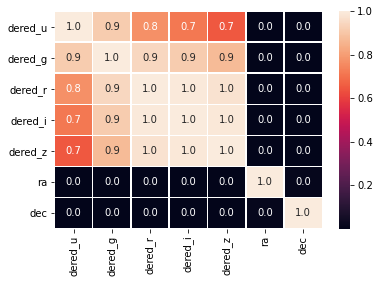

In [9]:
sns.heatmap(df.corr(), annot=True , linewidths=.5, fmt= '.1f')

In [6]:
# Creating features (substraction):
df = df.assign(u_g=df.dered_u-df.dered_g)
df = df.assign(g_r=df.dered_g-df.dered_r)
df = df.assign(r_i=df.dered_r-df.dered_i)
df = df.assign(i_z=df.dered_i-df.dered_z)
#features = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df = df.assign(g_u=df.dered_g-df.dered_u)
df = df.assign(r_g=df.dered_r-df.dered_g)
df = df.assign(i_r=df.dered_i-df.dered_r)
df = df.assign(z_i=df.dered_z-df.dered_i)
#div maybe?
df = df.assign(ug=df.dered_u/df.dered_g)
df = df.assign(gr=df.dered_g/df.dered_r)
df = df.assign(ri=df.dered_r/df.dered_i)
df = df.assign(iz=df.dered_i/df.dered_z)
#div turn maybe?
df = df.assign(gu=df.dered_g/df.dered_u)
df = df.assign(rg=df.dered_r/df.dered_g)
df = df.assign(ir=df.dered_i/df.dered_r)
df = df.assign(zi=df.dered_z/df.dered_i)

df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,redshift,u_g,g_r,r_i,i_z,g_u,r_g,i_r,z_i,ug,gr,ri,iz,gu,rg,ir,zi
0,19.18902,17.12673,16.17146,15.72892,15.38018,221.626406,1.104141,0.073469,2.06229,0.95527,0.44254,0.34874,-2.06229,-0.95527,-0.44254,-0.34874,1.120414,1.059071,1.028135,1.022675,0.892528,0.944223,0.972635,0.977828
1,19.71668,17.91488,17.06592,16.67560,16.41773,177.530289,43.921268,0.067499,1.80180,0.84896,0.39032,0.25787,-1.80180,-0.84896,-0.39032,-0.25787,1.100576,1.049746,1.023407,1.015707,0.908615,0.952611,0.977129,0.984536
2,19.73791,18.18637,17.31132,16.86139,16.57027,244.887682,35.063165,0.121360,1.55154,0.87505,0.44993,0.29112,-1.55154,-0.87505,-0.44993,-0.29112,1.085313,1.050548,1.026684,1.017569,0.921393,0.951884,0.974009,0.982735
3,19.29196,17.68699,16.91789,16.54745,16.24734,176.583097,11.647798,0.083287,1.60497,0.76910,0.37044,0.30011,-1.60497,-0.76910,-0.37044,-0.30011,1.090743,1.045461,1.022387,1.018471,0.916806,0.956516,0.978104,0.981864
4,19.99879,18.26889,17.44174,17.05618,16.75268,168.444269,41.977939,0.098327,1.72990,0.82715,0.38556,0.30350,-1.72990,-0.82715,-0.38556,-0.30350,1.094691,1.047424,1.022605,1.018117,0.913500,0.954724,0.977894,0.982206


In [7]:
kuka_dec = df.pop('dec')
kuka_ra = df.pop('ra')

In [83]:
#kuka_ug = df.pop('u_g')
#kuka_u = df.pop('dered_u')
#kuka_iz = df.pop('i_z')
#kuka_z = df.pop('dered_z')
#kuka_gr = df.pop('g_r')
#kuka_g = df.pop('dered_g')
#kuka_i = df.pop('dered_i')
#kuka_ri = df.pop('r_i')

In [8]:
data = df.pop('redshift')
X_train, X_test, Y_train, Y_test = train_test_split(df.values, data.values, test_size=0.20, random_state=42)

In [9]:
df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,u_g,g_r,r_i,i_z,g_u,r_g,i_r,z_i,ug,gr,ri,iz,gu,rg,ir,zi
0,19.18902,17.12673,16.17146,15.72892,15.38018,2.06229,0.95527,0.44254,0.34874,-2.06229,-0.95527,-0.44254,-0.34874,1.120414,1.059071,1.028135,1.022675,0.892528,0.944223,0.972635,0.977828
1,19.71668,17.91488,17.06592,16.67560,16.41773,1.80180,0.84896,0.39032,0.25787,-1.80180,-0.84896,-0.39032,-0.25787,1.100576,1.049746,1.023407,1.015707,0.908615,0.952611,0.977129,0.984536
2,19.73791,18.18637,17.31132,16.86139,16.57027,1.55154,0.87505,0.44993,0.29112,-1.55154,-0.87505,-0.44993,-0.29112,1.085313,1.050548,1.026684,1.017569,0.921393,0.951884,0.974009,0.982735
3,19.29196,17.68699,16.91789,16.54745,16.24734,1.60497,0.76910,0.37044,0.30011,-1.60497,-0.76910,-0.37044,-0.30011,1.090743,1.045461,1.022387,1.018471,0.916806,0.956516,0.978104,0.981864
4,19.99879,18.26889,17.44174,17.05618,16.75268,1.72990,0.82715,0.38556,0.30350,-1.72990,-0.82715,-0.38556,-0.30350,1.094691,1.047424,1.022605,1.018117,0.913500,0.954724,0.977894,0.982206


In [10]:
#KNeighbors
knn = KNeighborsRegressor(20)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
RMSE(preds, Y_test)

0.020592693245201556

In [11]:
norma = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
norma.mean(0), norma.std(0)

(array([ 2.54756248e-13,  2.66735333e-13, -1.19953388e-13,  3.40196974e-13,
         1.27325915e-13, -9.49316514e-15,  1.48585913e-14, -1.55354474e-14,
        -1.33815317e-14,  9.49316514e-15, -1.48585913e-14,  1.55354474e-14,
         1.33815317e-14,  1.80131218e-13, -3.17654059e-13,  1.78665419e-12,
        -1.38251076e-12,  1.84645765e-14, -3.09065809e-12,  3.05578264e-12,
        -2.66371234e-12]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]))

In [12]:
#KNeighbors & normalized data
knn = KNeighborsRegressor(20)
knn.fit(norma, Y_train)
preds = knn.predict(X_test_scaled)
RMSE(preds, Y_test)

0.019782552521584573

In [15]:
#Neural Network
neural = neural_network.MLPRegressor(hidden_layer_sizes=(200,), activation='relu',learning_rate_init= 0.00001)
neural.fit(norma, Y_train)

preds = neural.predict(X_test_scaled)

RMSE(preds, Y_test)

0.025234767175887855

In [16]:
#ExtraTrees
ex_tree = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=30, min_samples_split=15 ,min_samples_leaf=5)
ex_tree.fit(norma, Y_train)

preds = ex_tree.predict(X_test_scaled)

RMSE(preds, Y_test)

0.01941109250135121

In [17]:
#RandomForest
rn_forest = ensemble.RandomForestRegressor(n_estimators=200, min_samples_split=15,min_samples_leaf=5)
rn_forest.fit(norma, Y_train)

preds = rn_forest.predict(X_test_scaled)

RMSE(preds, Y_test)

0.01949017580173486

In [54]:
#GradientBoosting
model= GradientBoostingRegressor()
model.fit(norma, Y_train)
preds = model.predict(X_test_scaled)
RMSE(preds, Y_test)

0.021374308600654455

In [ ]:
###########################################################################################################################

In [19]:
dtest = pd.read_csv("testX.csv")
dtest.replace(-9999.000000, 18.545691, inplace=True)
scalar = StandardScaler()
dtest.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,ID
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,19.407799,17.763723,16.928125,16.531663,16.248073,184.881031,24.373270,124999.500000
std,0.988755,0.825710,0.754043,0.752050,0.769482,59.955587,18.686513,72168.927986
min,13.115050,11.879760,11.014940,10.584090,10.336530,0.004289,-11.252825,0.000000
25%,18.839950,17.369050,16.599410,16.204670,15.903587,151.295751,9.307271,62499.750000
50%,19.478290,17.945970,17.149180,16.743670,16.446075,185.958103,22.694393,124999.500000
75%,20.098837,18.339890,17.477320,17.067160,16.777130,221.791583,38.244590,187499.250000
max,29.409720,25.213750,18.430950,29.534010,27.901230,359.997379,70.172744,249999.000000


In [20]:
kuka_test_dec = dtest.pop('dec')
kuka_test_ra = dtest.pop('ra')
id_test = dtest.pop('ID')

In [21]:
# Creating features (substraction):
dtest = dtest.assign(u_g=dtest.dered_u-dtest.dered_g)
dtest = dtest.assign(g_r=dtest.dered_g-dtest.dered_r)
dtest = dtest.assign(r_i=dtest.dered_r-dtest.dered_i)
dtest = dtest.assign(i_z=dtest.dered_i-dtest.dered_z)
#features = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
dtest = dtest.assign(g_u=dtest.dered_g-dtest.dered_u)
dtest = dtest.assign(r_g=dtest.dered_r-dtest.dered_g)
dtest = dtest.assign(i_r=dtest.dered_i-dtest.dered_r)
dtest = dtest.assign(z_i=dtest.dered_z-dtest.dered_i)
#div maybe?
dtest = dtest.assign(ug=dtest.dered_u/dtest.dered_g)
dtest = dtest.assign(gr=dtest.dered_g/dtest.dered_r)
dtest = dtest.assign(ri=dtest.dered_r/dtest.dered_i)
dtest = dtest.assign(iz=dtest.dered_i/dtest.dered_z)
#div turn maybe?
dtest = dtest.assign(gu=dtest.dered_g/dtest.dered_u)
dtest = dtest.assign(rg=dtest.dered_r/dtest.dered_g)
dtest = dtest.assign(ir=dtest.dered_i/dtest.dered_r)
dtest = dtest.assign(zi=dtest.dered_z/dtest.dered_i)

dtest.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,u_g,g_r,r_i,i_z,g_u,r_g,i_r,z_i,ug,gr,ri,iz,gu,rg,ir,zi
0,18.57944,16.71833,15.88108,15.49288,15.18320,1.86111,0.83725,0.38820,0.30968,-1.86111,-0.83725,-0.38820,-0.30968,1.111322,1.052720,1.025057,1.020396,0.899830,0.949920,0.975556,0.980011
1,19.06882,17.68395,17.20045,16.92310,16.77381,1.38487,0.48350,0.27735,0.14929,-1.38487,-0.48350,-0.27735,-0.14929,1.078312,1.028110,1.016389,1.008900,0.927375,0.972659,0.983875,0.991178
2,18.72212,17.65607,17.32132,17.13485,16.99749,1.06605,0.33475,0.18647,0.13736,-1.06605,-0.33475,-0.18647,-0.13736,1.060379,1.019326,1.010882,1.008081,0.943059,0.981041,0.989235,0.991984
3,19.48814,18.26634,17.63848,17.28905,17.06759,1.22180,0.62786,0.34943,0.22146,-1.22180,-0.62786,-0.34943,-0.22146,1.066888,1.035596,1.020211,1.012975,0.937305,0.965627,0.980189,0.987191
4,20.12428,18.22417,17.23645,16.80466,16.46161,1.90011,0.98772,0.43179,0.34305,-1.90011,-0.98772,-0.43179,-0.34305,1.104263,1.057304,1.025695,1.020839,0.905581,0.945802,0.974949,0.979586


In [22]:
test_sc = pd.DataFrame(scalar.fit_transform(dtest), columns=dtest.columns)

In [81]:
prd3 =  knn.predict(test_sc)
subprd3 = pd.DataFrame(prd3, columns=['Redshift']).to_csv('ToSubmit3.csv', index_label = 'Id')

In [23]:
prd_forest2 = rn_forest.predict(test_sc)
subprd_rf2 = pd.DataFrame(prd_forest2, columns=['Redshift']).to_csv('ToSubmit_RNF3.csv', index_label = 'Id')

In [115]:
test_sc = pd.DataFrame(scalar.fit_transform(normalized), columns=normalized.columns)
prd_tree =  ex_tree.predict(test_sc)
subprd_tree = pd.DataFrame(prd_tree, columns=['Redshift']).to_csv('ToSubmit_forest2.csv', index_label = 'Id')

In [89]:
###################################################################################################